In [1]:
format compact
cd matlab

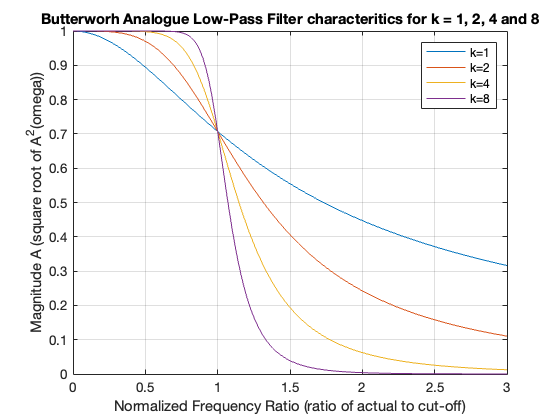

In [2]:
w_w0 = 0:0.02:3; 
Aw2k1 = sqrt(1./(w_w0.^2 + 1)); Aw2k2 = sqrt(1./(w_w0.^4 + 1));
Aw2k4 = sqrt(1./(w_w0.^8 + 1)); Aw2k8 = sqrt(1./(w_w0.^16 + 1));
plot(w_w0,Aw2k1,w_w0,Aw2k2,w_w0,Aw2k4,w_w0,Aw2k8),grid on
xlabel('Normalized Frequency Ratio (ratio of actual to cut-off)')
ylabel('Magnitude A (square root of A^2(omega))')
title('Butterworh Analogue Low-Pass Filter characteritics for k = 1, 2, 4 and 8')
legend('k=1','k=2','k=4','k=8')

In [3]:
syms s; den = (s + 1)*(s + 1/2 - j*sqrt(3)/2)*(s + 1/2 + j*sqrt(3)/2)

den =


(s + 1)*(s - (3^(1/2)*1i)/2 + 1/2)*(s + (3^(1/2)*1i)/2 + 1/2)


In [4]:
expand(den)

ans =


s^3 + 2*s^2 + 2*s + 1


In [5]:
[z,p,k] = buttap(3); 
[b,a] = zp2tf(z,p,k)

b =
         0         0         0    1.0000


a =
    1.0000    2.0000    2.0000    1.0000



G =


            1


  ---------------------


  s^3 + 2 s^2 + 2 s + 1


Continuous-time transfer function.


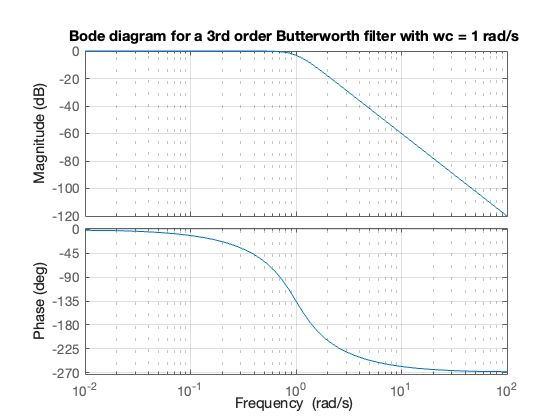

In [6]:
G = tf(b,a)
bode(G), grid on
title('Bode diagram for a 3rd order Butterworth filter with wc = 1 rad/s')

In [7]:
[z,p,k] = buttap(3); 
[b,a] = zp2tf(z,p,k);
fc = 1e3; % 1 kHz
wc = 2*pi*fc; % rad/s
format long
[b, a] = lp2lp(b, a, wc)

b =
     2.480502134423985e+11


a =
   1.0e+11 *
  Columns 1 through 3
   0.000000000010000   0.000000125663706   0.000789568352087
  Column 4
   2.480502134423986


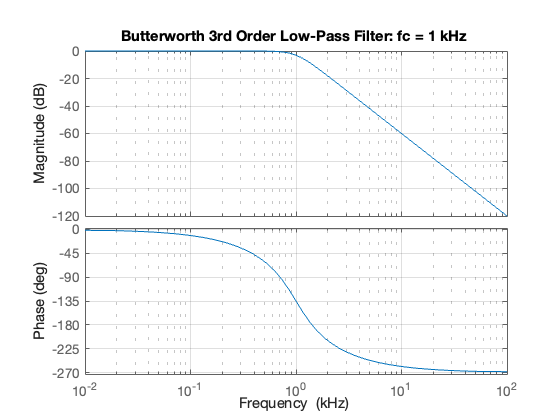

In [8]:
h = bodeplot(tf(b, a)); setoptions(h,'FreqUnits','kHz'),grid on
title('Butterworth 3rd Order Low-Pass Filter: fc = 1 kHz')

In [9]:
w = 0:0.05:400; % Range of frequencies to plot.
[z,p,k] = cheb1ap(2, 3);
[b, a] = zp2tf(z, p, k) % Convert zeros and poles of G(s) to polynomial form

b =
                   0                   0   0.501188646503800


a =
   1.000000000000000   0.644899651302867   0.707947780125280


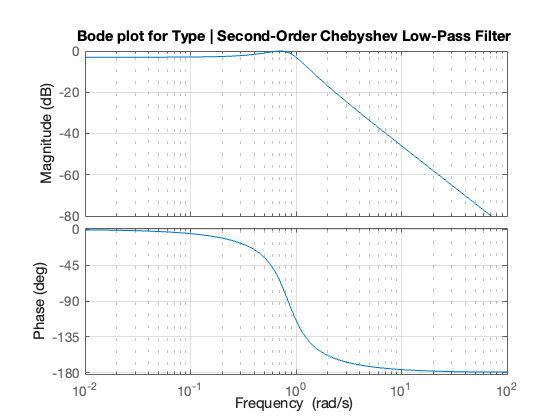

In [10]:
bode(b, a)
title('Bode plot for Type | Second-Order Chebyshev Low-Pass Filter')
grid on

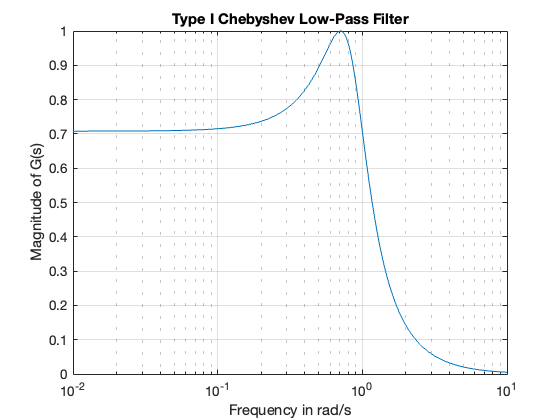

In [11]:
w = 0:0.01:10; 
Gs = freqs(b, a, w); % returns response as complex values
semilogx(w,abs(Gs)),grid on
xlabel('Frequency in rad/s'),ylabel('Magnitude of G(s)')
title('Type I Chebyshev Low-Pass Filter')